### Load Dependencie and Files

In [37]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import statistics


In [38]:
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [39]:
# Read the city data file and store it in a pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [40]:
# Read the ride data file and store it in a pandas DataFrame

ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### Inspect City Data DataFrame

In [41]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [42]:
# Get the columns and the rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [43]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [44]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [45]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [46]:
# Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [47]:
# Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

### Inspect Ride Data DataFrame

In [48]:
# Get the columns and the rows that are not null
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [49]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [50]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge DataFrames

In [51]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [52]:
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create DataFrames for Each Type of City
#### that showcases the average fare versus the total number of rides
read the 5.3.1

In [53]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

# Create the Rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

# Create the Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

### Get the Number of Rides for Each City Type

In [54]:
# Get the number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

In [55]:
# Create the suburban and rural ride count

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

### Get the Average Fare for Each City Type

In [56]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

In [57]:
# Get average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

### Get the Average Number of Drivers for Each City Type

In [58]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

### Create the Bubble Charts
- The x-axis is the number of rides for each city
- The y-axis is the average fare for each city
- The size of each marker is the average number of drivers in each city

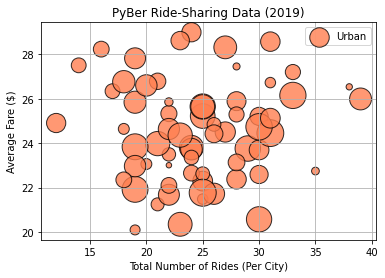

In [59]:
# Build the scatter plots for urban cities

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


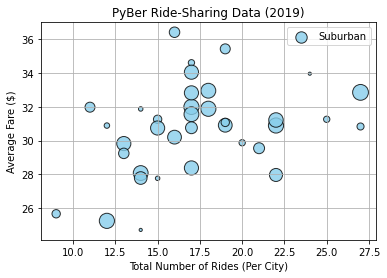

In [60]:
# Build the scatter plots for suburban cities

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

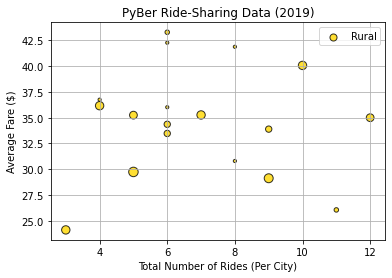

In [61]:
# Build the scatter plots for rural cities

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

### Create a Bubble Chart for All Cities
to showcase all the different city types in one chart

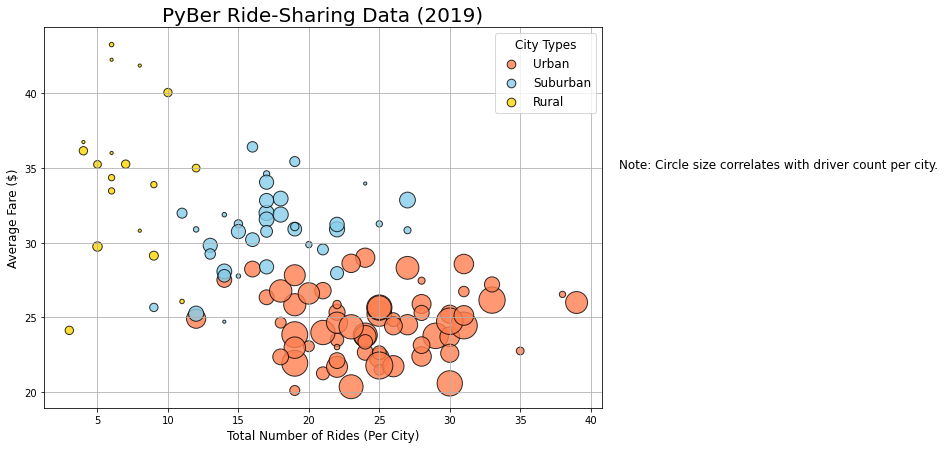

In [63]:
# Add the scatter charts for each type of city

plt.subplots(figsize=(10, 7))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid()


# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

### Summary Statistics for Number of Rides by City Type with Pandas method

In [70]:
# Calculate the mean of the ride count for each city type

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [71]:
# Calculate the median of the ride count for each city type

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [72]:
# Calculate the mode of the ride count for each city type

round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

### Summary Statistics for Number of Rides by City Type with Numpy method

In [73]:
import numpy as np
import scipy.stats as sts

In [74]:
# Calculate the measures of central tendency for the ride count for the urban cities

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [77]:
# Calculate the measures of central tendency for the ride count for the suburban cities

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [78]:
# Calculate the measures of central tendency for the ride count for the rural cities

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


### Summary Statistics for the Fare by City Type

#### First : Urban Cities

In [80]:
# we need to get the data from the "fare" column in each city type DataFrame

urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [81]:
# Calculate the measures of central tendency for the average fare for the Urban cities

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


#### Second : Suburban Cities

In [82]:
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the Suburban cities

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


#### Third : Rural Cities

In [83]:
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the Rural cities

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Summary Statistics for the Number of Drivers by City Type

In [85]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [86]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(suburban_drivers)
print(f"The median fare price for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $16.00.
The mode fare price for urban trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [87]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for suburban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for suburban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for suburban trips is {mode_suburban_drivers}.")

The mean fare price for suburban trips is $13.71.
The median fare price for suburban trips is $16.00.
The mode fare price for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [88]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for rural trips is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for rural trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for rural trips is {mode_rural_drivers}.")

The mean fare price for rural trips is $4.30.
The median fare price for rural trips is $4.00.
The mode fare price for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


## Create Box-and-Whisker Plots

## for Ride Count Data

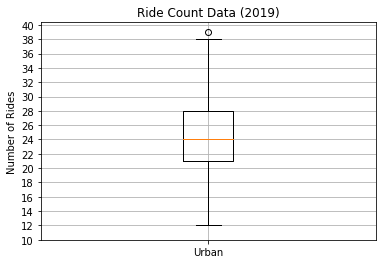

In [89]:
# Create a box-and-whisker plot for the urban cities ride count

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

#### There is at least one outlier, which is close to 40. This our maximum data point, 39
#### The minimum is 12.
#### The median is 24 or the 50th percentile.
#### The standard deviation is about 5 because the box upper and lower boundaries represent the upper and lower quartiles.

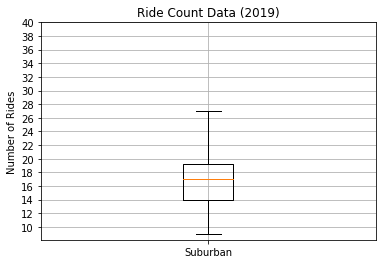

In [102]:
# Create a box-and-whisker plot for the suburban cities ride count

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [97]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

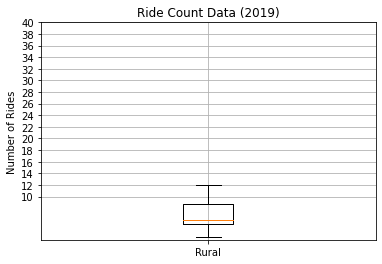

In [95]:
# Create a box-and-whisker plot for the Rural  cities ride count

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [98]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

### To all the city type in one plot

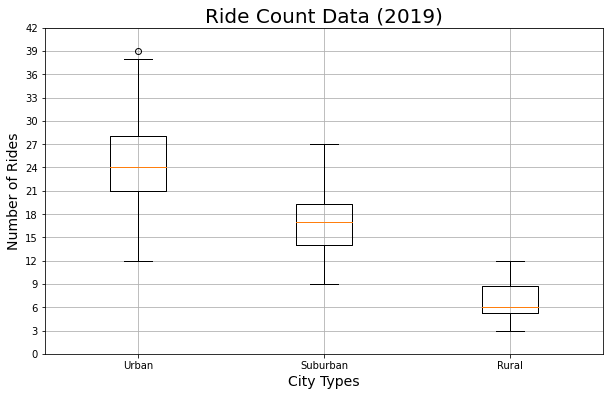

In [127]:
# Add all ride count box-and-whisker plots to the same graph

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

#### There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban and suburban cities, respectively.

## for Ride Fare Data

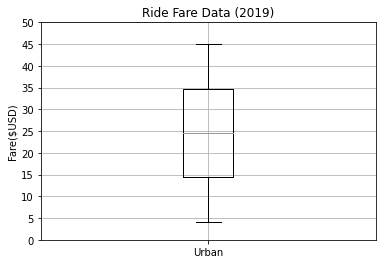

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [99]:
# Create a box-and-whisker plot for the urban fare data

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

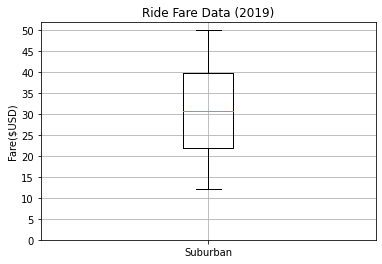

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [105]:
# Create a box-and-whisker plot for the suburban fare data

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

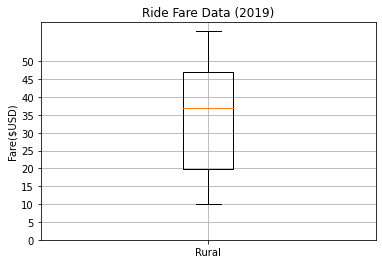

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [119]:
# Create a box-and-whisker plot for the Rural fare data

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

### for all three city types

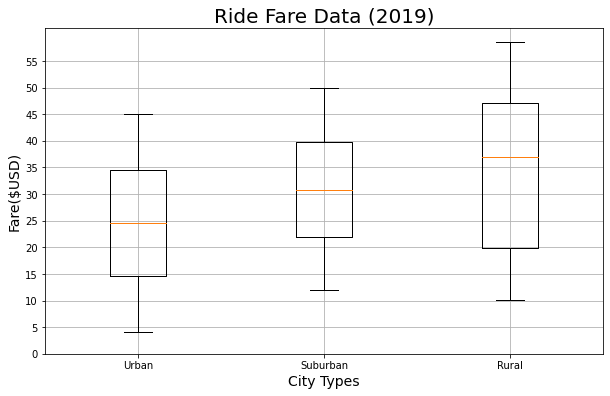

In [126]:
# Add all ride fare box-and-whisker plots to the same graph

x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")
plt.show()

## for Driver Count Data

### for urban cities

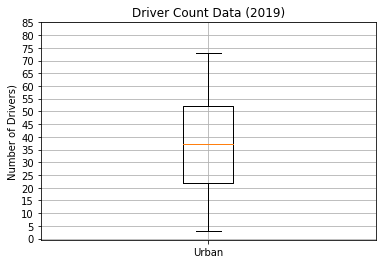

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [112]:
# Create the box-and-whisker plot for the urban driver count data

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### for suburban cities

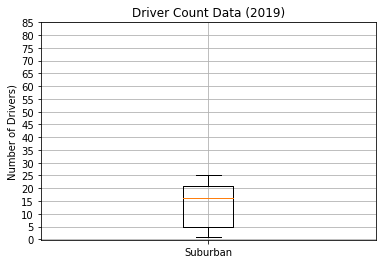

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [113]:
# Create the box-and-whisker plot for the suburban driver count data

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### for rural cities

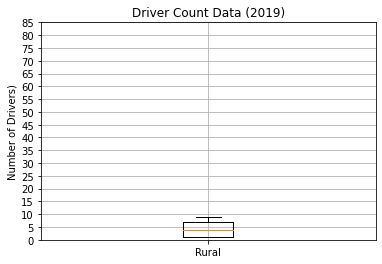

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [114]:
# Create the box-and-whisker plot for the rural driver count data

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)


# Add the title, y-axis label and grid

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

### all three city types in one plot

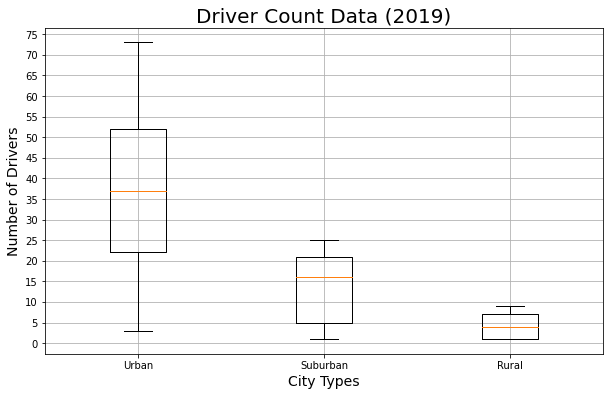

In [125]:
# Add all driver count box-and-whisker plots to the same graph

x_labels = ["Urban", "Suburban","Rural"]
fare_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(fare_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")
plt.show()

## Get the Percentage of Fares for Each City Type

### we need to do the following:
#### Get the total fares for each city type --   sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
#### Get the total for all the fares for all the city types --    total_fares = pyber_data_df["fare"].sum()
#### Calculate the percentage of the total fares for each city type --  type_percents = 100 * sum_fares_by_type / total_fares

In [133]:
# in one command

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()


In [134]:
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Pie Chart for the Percentage of Fares by City Type

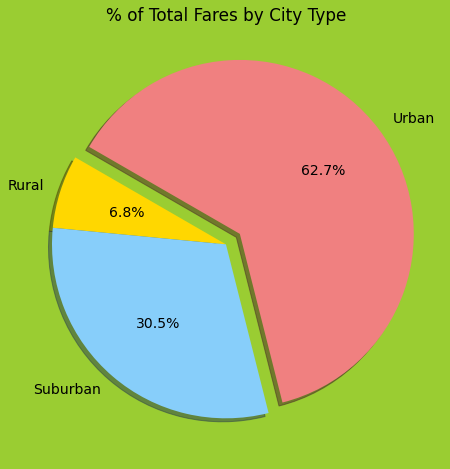

In [147]:
# Import mpl to change the plot configurations using rcParams

import matplotlib as mpl


# Build Pie Chart

plt.subplots(figsize=(10, 8), facecolor='yellowgreen')
plt.pie(type_percents,
                       labels=["Rural", "Suburban", "Urban"],
                       colors=["gold", "lightskyblue", "lightcoral"],
                       explode=[0, 0, 0.1],
                       autopct='%1.1f%%',
                       shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

## Calculate Ride Percentages

### we need to do the following:

#### Get the total number of rides for each city type --- pyber_data_df.groupby(["type"])
#### Get the total rides for all the city types --- pyber_data_df["ride_id"].count()
#### Calculate the percentage of the total rides for each city type.

In [149]:
# Calculate the percentage of rides for each city type

ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

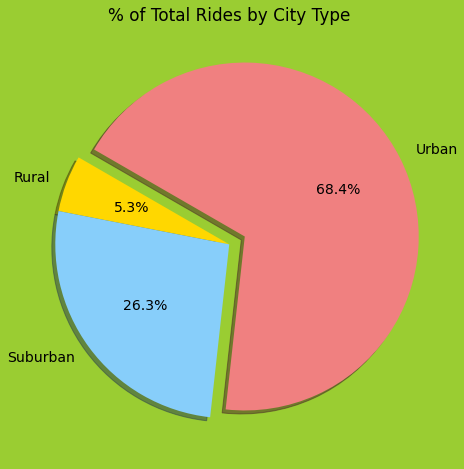

In [151]:
# Build percentage of rides by city type pie chart

plt.subplots(figsize=(10, 8), facecolor='yellowgreen')
plt.pie(ride_percents,
                        labels=["Rural", "Suburban", "Urban"],
                        colors=["gold", "lightskyblue", "lightcoral"],
                        explode=[0, 0, 0.1],
                        autopct='%1.1f%%',
                        shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

## Calculate Driver Percentages

### we need to do the following:

#### Get the total number of drivers for each city type.
#### Get the total drivers for all the city types.
#### Calculate the percentage of the total drivers for each city type.

In [152]:
# Calculate the percentage of drivers for each city type

driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

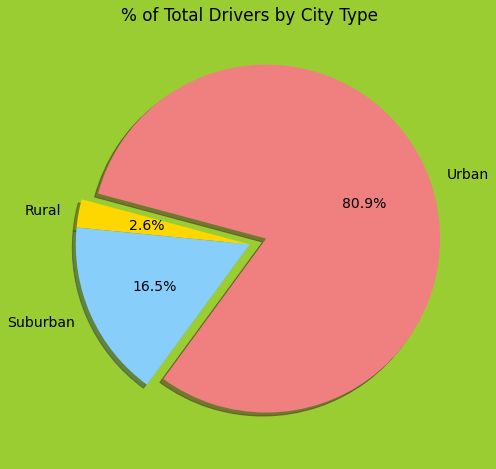

In [153]:
# Build percentage of rides by city type pie chart

plt.subplots(figsize=(10, 8), facecolor='yellowgreen')
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()